# DLCV Homework 1

Céline Nauer

Sources I have worked with: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html

## Exercise 2

Preprocess data: Load images, split into training and test data and do PCA with the specified number of principal components. 

In [1]:
import cv2
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from skimage.util import view_as_blocks
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline


files = [],[],[]
path  = "/Users/celine/Library/Mobile Documents/com~apple~CloudDocs/NSC/VLL/DLCV/Exercises/hw1/p2_data"
n_components = None
files = [],[],[]


for i in os.listdir(path):
    names = re.findall(r'\d+', i)
    files[0].append(names[0])
    files[1].append(names[1])
    im = cv2.imread(path + "/" + i, 0)
    shape0 = np.array(im).shape
    files[2].append(im) #(im.flatten())
    

#X_train, X_test, y_train, y_test = train_test_split(files[2], files[0],
#                                                    stratify=files[0],
#                                                    test_size=0.4)
X_train = []
X_test = []
y_train = []
y_test = []
n = 0
for i in files[1]: 
    if int(i) <= 6: 
        X_train.append(files[2][n])
        y_train.append(files[0][n])
        
    elif int(i) >6:
        X_test.append(files[2][n])
        y_test.append(files[0][n])
    n += 1
        
        
X_train = np.array(X_train).reshape(240,-1)
X_test = np.array(X_test).reshape(160,-1)


pca = PCA(n_components=n_components).fit(X_train)

meanimage = pca.mean_.reshape(shape0)
print(X_train.shape)
print(X_test.shape)


ModuleNotFoundError: No module named 'cv2'

Plot the mean face

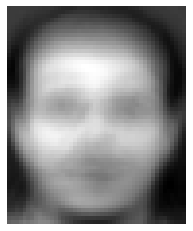

In [600]:
plt.figure()
plt.imshow(pca.mean_.reshape(shape0),
           cmap=plt.cm.gray)
plt.axis('off')
plt.savefig("meanface.jpg")
plt.show()



Plot the first four principal components

/anaconda3/envs/dlcv37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


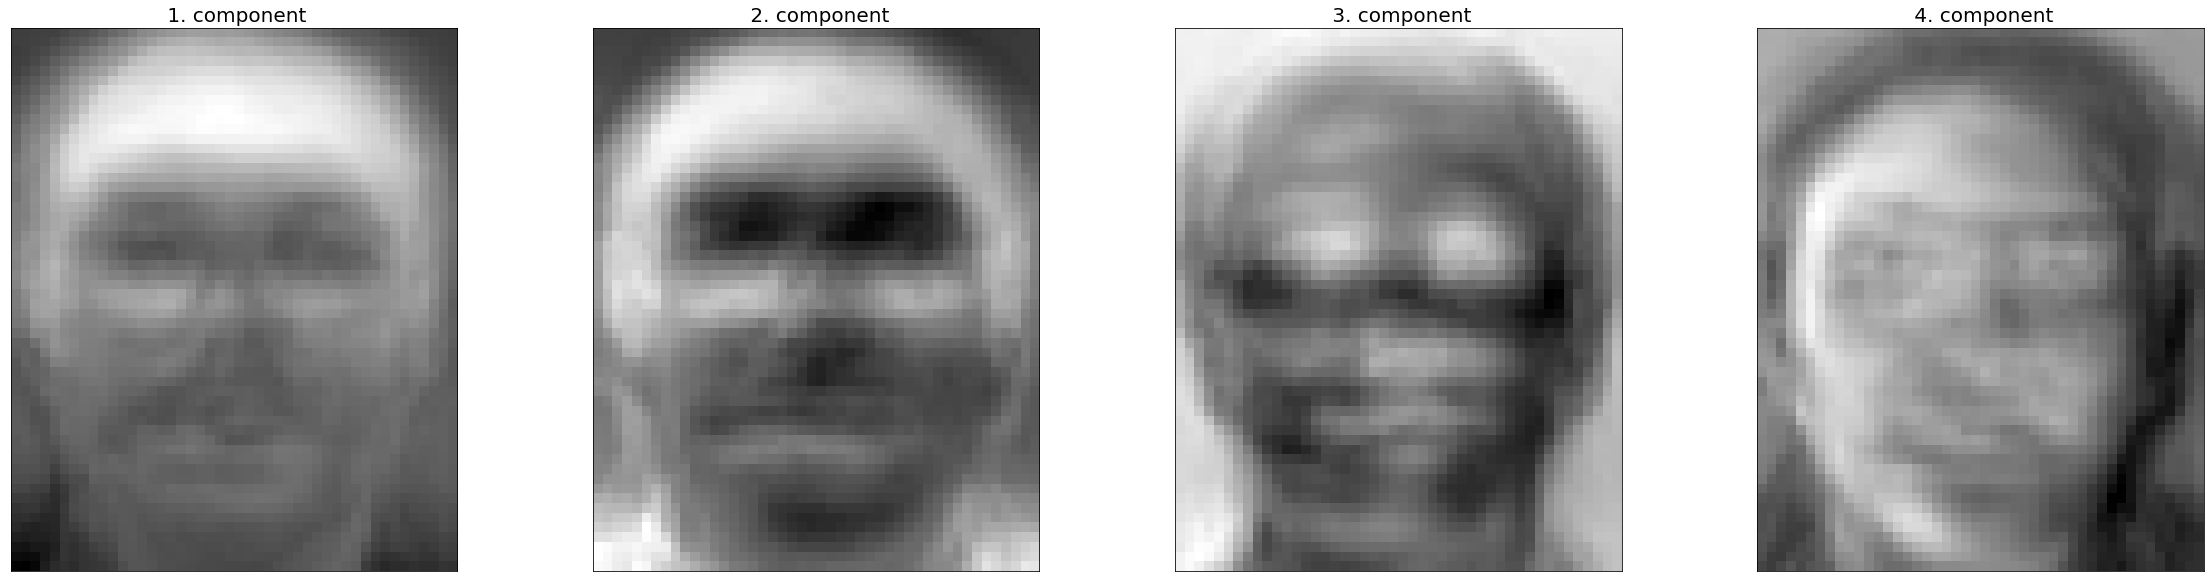

In [601]:
fig = plt.figure(figsize = (40,10))
for i in range(4):
    ax = fig.add_subplot(1, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(shape0),
              cmap=plt.cm.gray)
    ax.set_title(" %s. component" % int(i+1), size = 20)
fig.savefig("four_components.jpg")
fig.show()

Plot first image of first subject and project it to the PCA eigenspace. Showing the first n = 3; 45; 140; 229 

(1, 2576)


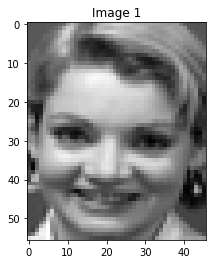

In [602]:
img_1 = cv2.imread(path + "/" + "1_1.png", 0).reshape(1,-1)
print(img_1.shape)
plt.title("Image 1")
plt.imshow(img_1.reshape(shape0), cmap=plt.cm.gray)
plt.savefig("original_image.jpg")
plt.show()

In [603]:
projection = pca.transform(img_1)
projection.shape

(1, 240)

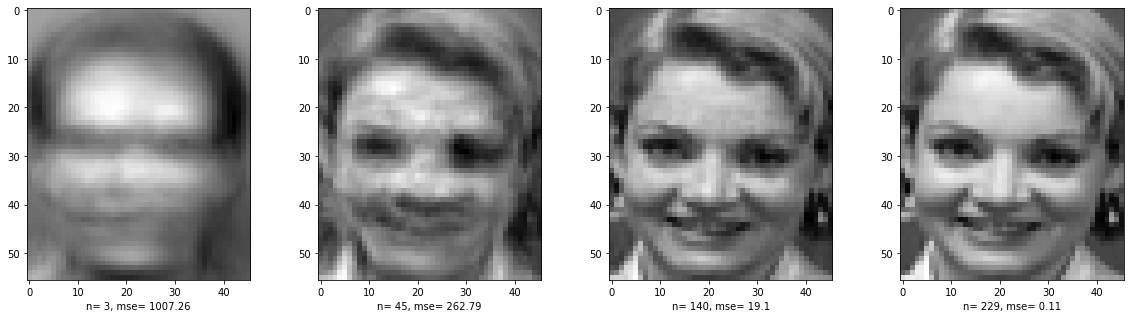

In [604]:
plt.figure(figsize = (20, 5))
values = [3, 45, 140, 229]

for i in values:
    approx = projection[:,:i].dot(pca.components_[:i])+meanimage.flatten()
    mse = np.mean((approx - img_1)**2)
    plt.subplot(1,4,values.index(i)+1)
    plt.xlabel("n= %s" % str(i)+", mse= %s" % str(np.round(mse,2)))
    plt.imshow(approx.reshape(shape0), cmap = plt.cm.gray)    
    
plt.savefig("reconstructed_images.jpg")
plt.show()

K nearest neighbors

[0.70416667 0.59166667 0.52083333]
[0.92916667 0.85       0.79166667]
[0.92916667 0.8625     0.7625    ]


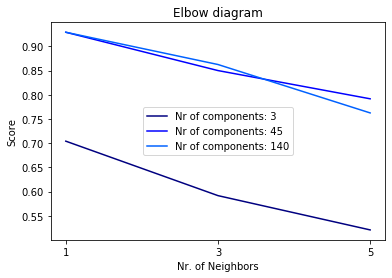

In [609]:
## source : https://scikit-learn.org/stable/modules/compose.html
#
#for i in nrcomponents:
#    for train_index, test_index in cv.split(X_train):
#
#        X_train_cv = np.array(X_train)[train_index]
#        print('hey', X_train_cv)
#        X_val_cv = np.array(X_train)[test_index]
#        y_train_trafo = np.array(y_train)[train_index]
#        y_val_trafo = np.array(y_train)[test_index]
#
#        pca = PCA(n_components=i).fit(X_train_cv)
#        X_train_trafo = pca.transform(X_train_cv)
#        X_val_trafo = pca.transform(X_val_cv)
#
#        results_knn = []
#        for j in nrneighbors:
#            clf = KNeighborsClassifier(n_neighbors=j)
#            clf.fit(X_train_trafo, y_train_trafo)
#            y_pred = clf.predict(X_val_trafo)
#            acc = accuracy_score(y_val_trafo, y_pred)
#            results_knn.append(acc)
#
#        evaluation[0].append(i)
#        evaluation[1].append(results_knn)
#        results_knn = []
#        X_val_cv = []
#        X_train_cv = []
#        y_train_trafo = []
#        y_val_trafo = []
#
#print("Nr principal components:", evaluation[0])
#print("Results for k = 1,3 5:", evaluation[1])

    
X_train_trafo = pca.transform(X_train)
clf = KNeighborsClassifier(metric = 'euclidean')
nrneighbors  = [1,3,5]
params = {"n_neighbors":nrneighbors}
clf_gs = GridSearchCV(clf, params, cv=3) 
nrcomponents = [3, 45, 140]
plt.figure()
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
for i in nrcomponents:
    clf_gs.fit(X_train_trafo[:,:i], y_train)
    result = clf_gs.cv_results_["mean_test_score"]
    plt.plot(nrneighbors, result, '-', color = next(colors), label = "Nr of components: %s" % i)
    print(result)
    plt.title("Elbow diagram")
    plt.xlabel("Nr. of Neighbors")
    plt.ylabel("Score")
    plt.legend()
    plt.xticks([1,3,5])
plt.savefig("KNN_elbow_2.jpg")
plt.show()

The above diagram visualizes that the best choice is 140 components and 1 nearest neighbor. Now we check the prediction accuracy on the test set based on these parameters. 

In [574]:
X_test_trafo = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_trafo[:,:140], y_train)
y_pred = knn.predict(X_test_trafo[:,:140])
acc = accuracy_score(y_pred, y_test)
print("The accuracy of the recognition is:", acc)

The accuracy of the recognition is: 0.9375


## Exercise 3

Preprocessing, creating test and training set and slicing the images

In [575]:
path  = "/Users/celine/Library/Mobile Documents/com~apple~CloudDocs/NSC/VLL/DLCV/Exercises/hw1/p3_data/"
data = [],[],[]
categories = ["banana", "fountain", "reef", "tractor"]

for i in categories:
    n = 0
    for j in os.listdir(path + i ):
        data[0].append(i)
        data[1].append(n)
        im = cv2.imread(path + i + "/" + j, )
        b, g, r = cv2.split(im)  # get b,g,r
        rgb_img = cv2.merge([r, g, b])
        data[2].append(rgb_img)
        n +=1

#X_train, X_test, y_train, y_test = train_test_split(data[2], data[0],
#                                                    stratify=data[0],
#                                                    test_size=0.25)



In [576]:
X_train = []
X_test = []
y_train = []
y_test = []
n = 0
for i in data[1]: 
    if int(i) <= 374: 
        X_train.append(data[2][n])
        y_train.append(data[0][n])
        
    elif int(i) >126:
        X_test.append(data[2][n])
        y_test.append(data[0][n])
    n += 1

X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
print(np.array(X_train).shape)
print(np.array(X_test).shape)




(1500, 64, 64, 3)
(500, 64, 64, 3)


### Part 1

Slice up 4 images, 1 of each category and plot the image patches

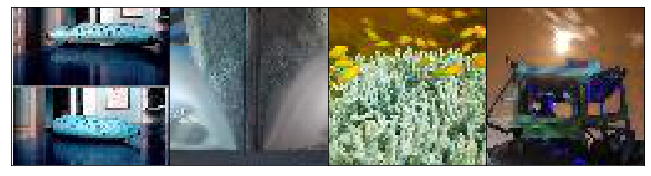

In [580]:
import random
%matplotlib inline

original_images = []
images = []
for i in categories:
    randomimg = random.choice(os.listdir(path + '/'+ i ))
    im = cv2.imread(path + "/" + i + "/" + randomimg)
    image_blocks = view_as_blocks(im, block_shape = (16, 16, 3)).squeeze()
    rd_slices = random.sample(range(4),3)
    original_images.append(im)
    images.append(image_blocks[rd_slices[0]][rd_slices[0]].flatten())
    images.append(image_blocks[rd_slices[1]][rd_slices[1]].flatten())
    images.append(image_blocks[rd_slices[2]][rd_slices[2]].flatten())
    

def plot_portraits(images, h, w, n_row, n_col, filename): # function from carlos
    plt.figure(figsize=(2.2 * n_col, 2.2* n_row))
    plt.subplots_adjust(bottom=0, left=0, right=1, top=1, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w, 3)))
        plt.xticks(())
        plt.yticks(())
    plt.savefig(filename)
    plt.show()
    
plot_portraits(original_images, 64, 64, 1, 4, "31_original.jpg")


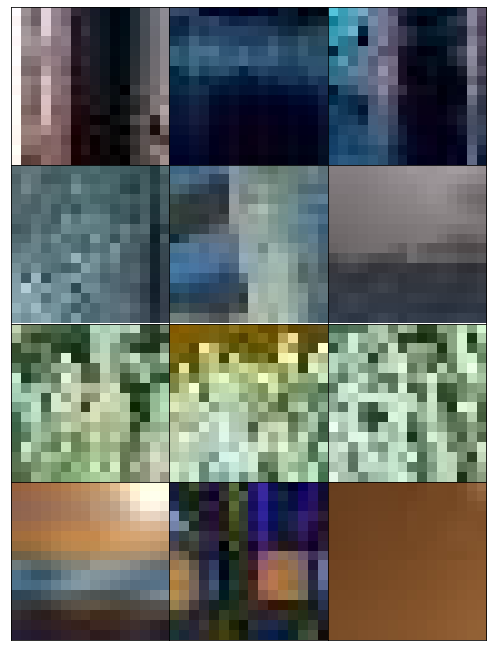

In [584]:
plot_portraits(images, 16, 16, 4, 3, "31_patches.jpg")


Just from the above image patches it is not generally visible to which category a patch belongs. However, sometimes there are some shapes which give a good indication.

### Part 2

In [585]:
def sliceimages(X_train): 
    slicedimages = []
    for i in X_train:
        image_blocks = view_as_blocks(i, block_shape = (16, 16, 3)).squeeze()
        for i in image_blocks:
            for j in i:
                slicedimages.append(j.flatten())
    return slicedimages


X_train_patches = sliceimages(X_train)
X_test_patches = sliceimages(X_test)
print(np.array(X_train_patches).shape)

def enlargey(y_train, times):
    y_train_new = []
    for i in y_train: 
        for i in range(times):
            y_train_new.append(i)
            
    return y_train_new

y_train_patches = enlargey(y_train, 16)
y_test_patches = enlargey(y_test, 16)
print(np.array(y_train_patches).shape)
print(np.array(X_test_patches).shape)

(24000, 768)
(24000,)
(8000, 768)


In [586]:
pca = PCA(n_components = 3).fit(X_train_patches)
X_train_patches_pca = pca.transform(X_train_patches)
X_test_patches_pca = pca.transform(X_test_patches)
print(np.array(X_train_patches_pca).shape)

km = KMeans( n_clusters = 15, max_iter = 5000)
km.fit(X_train_patches)
y_pred = km.predict(X_train_patches)

(24000, 3)


In [587]:
k_means_labels = km.labels_
centroids = pca.transform(km.cluster_centers_)

print(np.array(k_means_cluster_centers))
print(set(np.array(k_means_labels)))

[[ 3.08529762e+03  1.78476079e+02 -9.46988997e+00]
 [-1.02505018e+03 -5.68591070e+01 -6.18774999e+02]
 [ 5.73543651e+01 -1.45359660e+01  1.01513013e+03]
 [ 3.99464499e+02 -9.23593866e+01 -9.56332381e+02]
 [ 1.61813037e+03  8.30289980e+01  8.32752957e+02]
 [-2.19915210e+03  1.79506653e+02  2.01997541e+00]
 [ 6.58173554e+02  5.10170786e+01  3.34534822e+01]
 [ 9.04698003e+02  1.64515789e+03 -5.83101902e+01]
 [-3.33520799e+02  1.23756193e+01  2.09212621e+01]
 [-4.17782461e+02 -1.01108120e+03  3.05767713e+01]
 [ 1.74275438e+03  7.19301605e+00 -3.35565049e+02]
 [-5.74562323e+02  1.12092717e+03  4.20116433e+00]
 [ 8.81810990e+02 -1.29954867e+03  3.47114511e+01]
 [-1.26782123e+03 -3.65193185e+01  2.24531379e+02]
 [-1.42121000e+02 -3.96964254e+01 -4.30246038e+01]]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


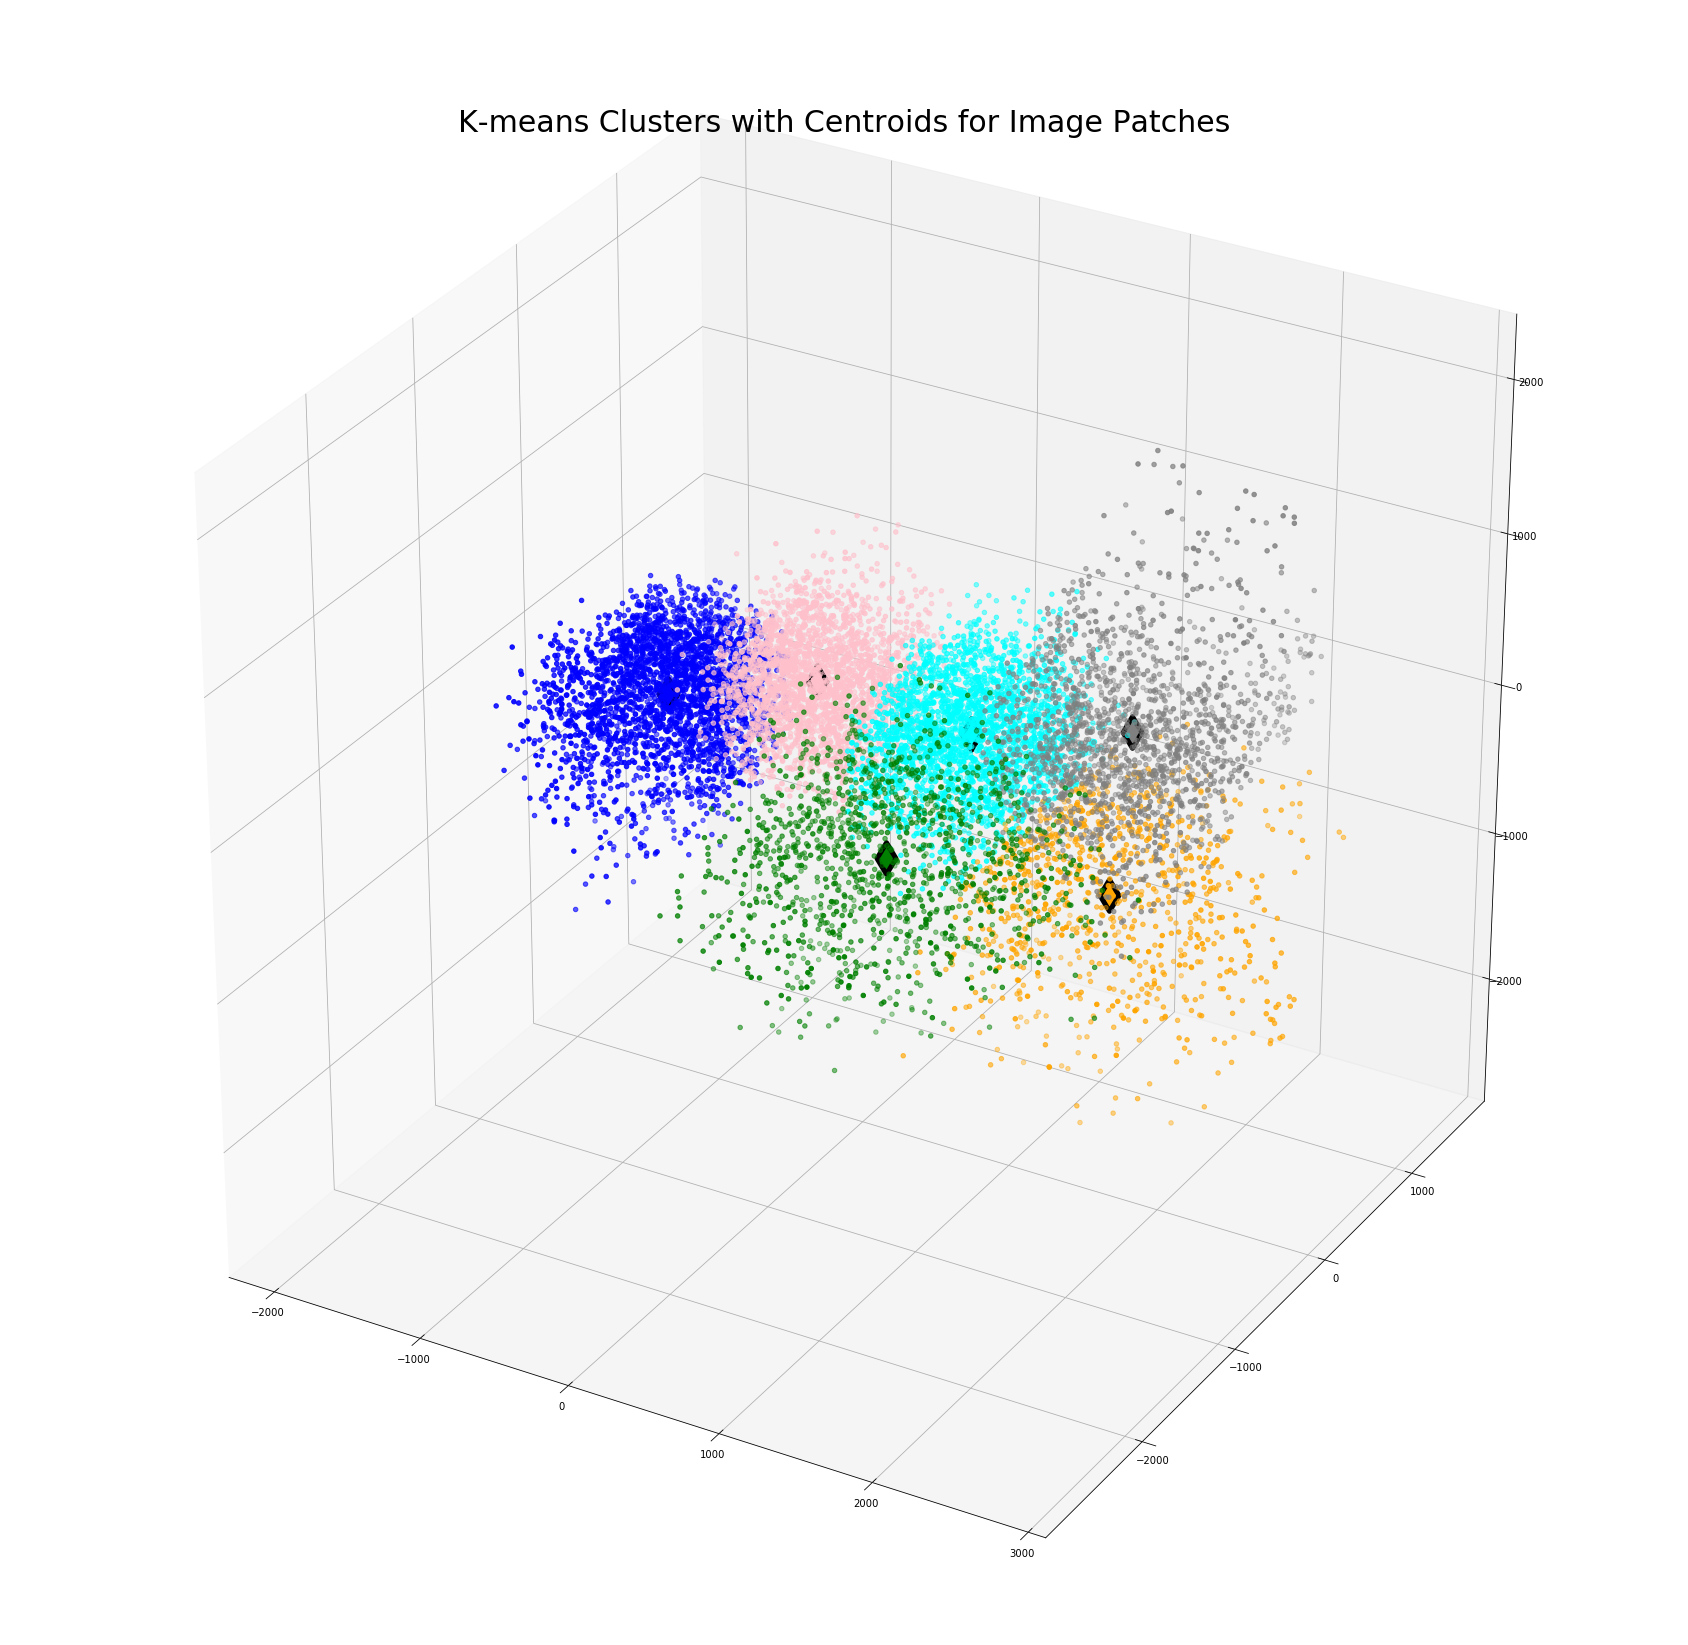

In [588]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

plt.figure(figsize = (30,30))
ax = plt.axes(projection="3d")
ax.scatter3D(X_train_patches_pca[k_means_labels == 0, 0], X_train_patches_pca[k_means_labels == 0, 1],X_train_patches_pca[k_means_labels == 0, 2], color = "blue")
ax.scatter3D(X_train_patches_pca[k_means_labels == 1, 0], X_train_patches_pca[k_means_labels == 1, 1],X_train_patches_pca[k_means_labels == 1, 2], color = "orange")
ax.scatter3D(X_train_patches_pca[k_means_labels == 2, 0], X_train_patches_pca[k_means_labels == 2, 1],X_train_patches_pca[k_means_labels == 2, 2], color = "pink")
ax.scatter3D(X_train_patches_pca[k_means_labels == 3, 0], X_train_patches_pca[k_means_labels == 3, 1],X_train_patches_pca[k_means_labels == 3, 2], color = "green")
ax.scatter3D(X_train_patches_pca[k_means_labels == 4, 0], X_train_patches_pca[k_means_labels == 4, 1],X_train_patches_pca[k_means_labels == 4, 2], color = "aqua")
ax.scatter3D(X_train_patches_pca[k_means_labels == 5, 0], X_train_patches_pca[k_means_labels == 5, 1],X_train_patches_pca[k_means_labels == 5, 2], color = "grey")

ax.scatter3D(centroids[0,0], centroids[0,1],centroids[0,2], color = "blue", s = 500,marker="d",edgecolor = 'black',linewidths=5)
ax.scatter3D(centroids[1,0], centroids[1,1],centroids[1,2], color = "orange", s = 500,marker="d",edgecolor = 'black',linewidths=5)
ax.scatter3D(centroids[2,0], centroids[2,1],centroids[2,2], color = "pink", s = 500,marker="d",edgecolor = 'black',linewidths=5)
ax.scatter3D(centroids[3,0], centroids[3,1],centroids[3,2], color = "green", s = 500,marker="d",edgecolor = 'black',linewidths=5)
ax.scatter3D(centroids[4,0], centroids[4,1],centroids[4,2], color = "aqua", s = 500,marker="d",edgecolor = 'black',linewidths=5)
ax.scatter3D(centroids[5,0], centroids[5,1],centroids[5,2], color = "grey", s = 500,marker="d",edgecolor = 'black',linewidths=5)
ax.set_title("K-means Clusters with Centroids for Image Patches", size = 30)
plt.savefig("32_Kmeans.jpg")
plt.show()

#plt.show()
#Axes3D.scatter(X_train_patches_pca[y_pred == 0, 0], X_train_patches_pca[y_pred == 0, 1], X_train_patches_pca[y_pred == 0,2], c=y_pred)
#plt.show()

### Part 3

In [589]:
def calculatedist(patches, centroids, length): 
    patchesvscentroids = [] 
    for i in patches: 
        distances = []
        for j in centroids:
            dist = np.linalg.norm(i-j)
            distances.append(dist)
        rec = np.reciprocal(distances)
        recsum = np.sum(rec)
        patchesvscentroids.append(rec/recsum)
    imagesvscentroids = []
    n = 0
    temp = []
    for i in range(length):
        temp.append(patchesvscentroids[n:n+16])
        n+=1  
    return temp
        
        
X_train_new = calculatedist(X_train_patches_pca, centroids, len(X_train))
X_test_new = calculatedist(X_test_patches_pca, centroids, len(X_test))
#patches = calculatedist(X_train_patches_pca, centroids)           
print(np.array(X_train_new).shape)

(1500, 16, 15)


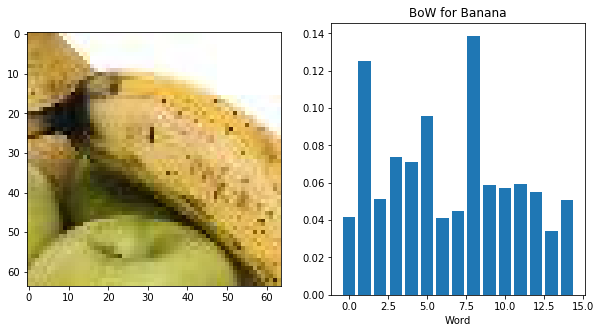

In [590]:
picture1=X_train_new[0]
picture11 = [np.max(x) for x in picture1[1]]

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(X_train[0])
plt.subplot(122)
plt.bar(range(15), picture11)
plt.title("BoW for Banana")
plt.xlabel("Word")
plt.savefig("33_BowBanana.jpg")
plt.show()


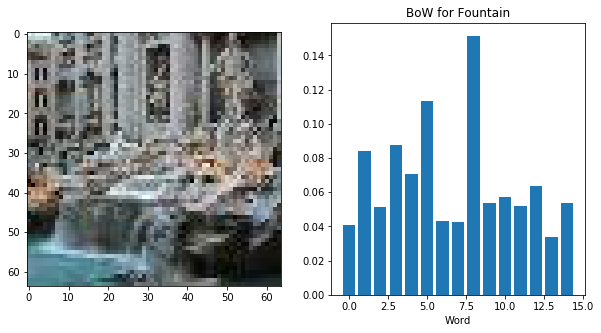

In [591]:
picture1=X_train_new[400]
picture11 = [np.max(x) for x in picture1[1]]

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(X_train[400])
plt.subplot(122)
plt.bar(range(15), picture11)
plt.title("BoW for Fountain")
plt.xlabel("Word")
plt.savefig("33_BowFountain.jpg")


plt.show()



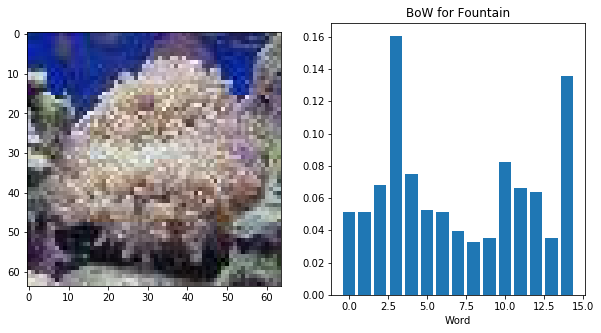

In [592]:
picture1=X_train_new[900]
picture11 = [np.max(x) for x in picture1[1]]

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(X_train[900])
plt.subplot(122)
plt.bar(range(15), picture11)
plt.title("BoW for Fountain")
plt.xlabel("Word")
plt.savefig("33_BowReef.jpg")


plt.show()

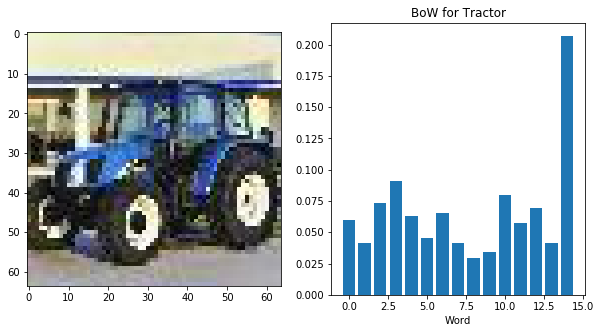

In [593]:
picture1=X_train_new[1200]
picture11 = [np.max(x) for x in picture1[1]]

plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(X_train[1200])
plt.subplot(122)
plt.bar(range(15), picture11)
plt.title("BoW for Tractor")
plt.xlabel("Word")
plt.savefig("33_BowTractor.jpg")


plt.show()

### Part 4

In [595]:
def maxbag(data):
    new_data = []
    for im in data: 
            pic = [np.max(x) for x in im[1]]
            new_data.append(pic)
            
    return new_data

X_train_bag = maxbag(X_train_new)
X_test_bag = maxbag(X_test_new)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bag, y_train)
y_pred = knn.predict(X_test_bag)
acc = accuracy_score(y_pred, y_test)
print("The accuracy of the BoW-KNN is:", acc)

The accuracy of the BoW-KNN is: 0.218
